# Task 1


In [1]:
from scipy.sparse import csc_matrix, coo_matrix
from scipy.sparse.linalg import lsqr
import matplotlib.pyplot as plt
import numpy as np
import math
import zipfile
import os

In [2]:
def construct_X(M, alphas, Np = None):
    # choose an appropriate Value for Np
    if Np is None:
        Np = int(np.ceil(np.sqrt(2) * M))
        if Np % 2 == 0:
            Np += 1
    
    # Define the coordinate system
    extent = (M-1)/2
    j_a, j_b = np.mgrid[-extent:extent+1, -extent:extent+1]
    C = np.row_stack([j_a.flatten(), j_b.flatten()])
    
    # Convert angles to radians and create unit vectors
    alphas = np.deg2rad(alphas)
    n = np.row_stack([-np.sin(alphas), np.cos(alphas)])

    # Project pixels onto sensor array
    p = (n.T @ C) + ((Np-1)/2)
    p_split_f, p_split_i = np.modf(p)
    
    # Calculate weights and indices
    w0 = 1 - p_split_f
    w1 = p_split_f
    i_0 = p_split_i.astype(int)
    i_1 = i_0 + 1

    # Adjust indices for multiple projections
    for i in range(len(alphas)):
        i_0[i,:] += Np * i
        i_1[i,:] += Np * i
    
    # Flatten arrays for sparse matrix construction
    i_indices = np.concatenate([i_0, i_1]).flatten()
    j_indices = np.tile(np.arange(C.shape[1]), 2*len(alphas))
    weights = np.concatenate([w0, w1]).flatten()

    # Construct sparse matrix
    X = coo_matrix((weights, (i_indices, j_indices)), 
                   shape=(Np * len(alphas), C.shape[1]), 
                   dtype=np.float32)
    
    return X

In [3]:
# Unzip the file 
if not os.path.exists('hs_tomography'):
    with zipfile.ZipFile('hs_tomography.zip', 'r') as zip_ref:
        zip_ref.extractall()

# Test visualization
test_vis = construct_X(10, [-33, 1, 42])

# Load the example matrix
X_example = np.load('hs_tomography/X_example.npy')

# Plot both matrices for comparison
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.imshow(X_example, cmap='gray', interpolation='nearest')
plt.title("Provided Example")
plt.subplot(122)
plt.imshow(test_vis.toarray(), cmap='gray', interpolation='nearest')
plt.title("Our Implementation")
plt.show()

# Calculate and print sparsity for the full-size problem
alphas_195 = np.load('hs_tomography/alphas_195.npy')  # Load the full set of angles
X_full = construct_X(195, alphas_195, 275)
sparsity = X_full.nnz / (X_full.shape[0] * X_full.shape[1])
print(f"Sparsity of X: {sparsity:.6f}")

NameError: name 'os' is not defined

# Task 2

Small version:


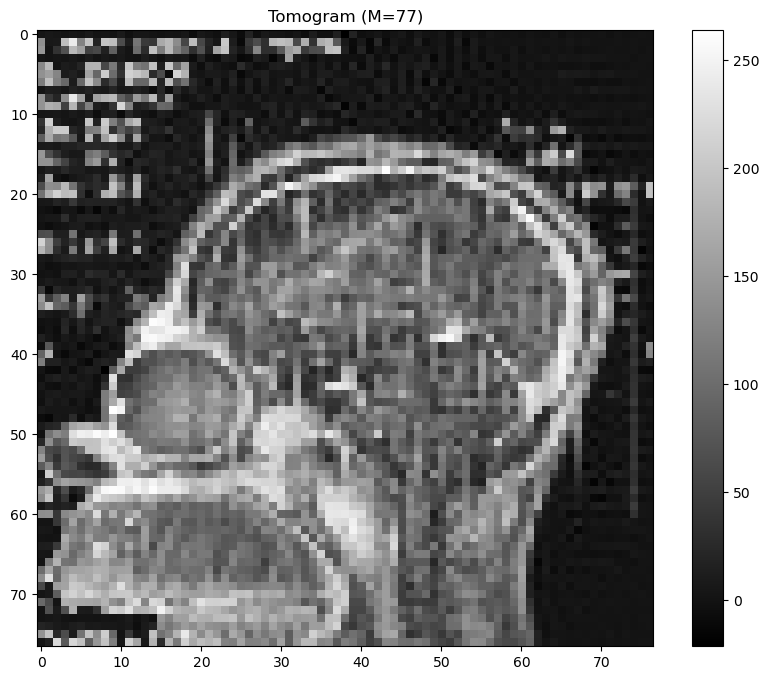

Number of non-zero entries: 1066978
Sparsity: 0.981656

Large version:


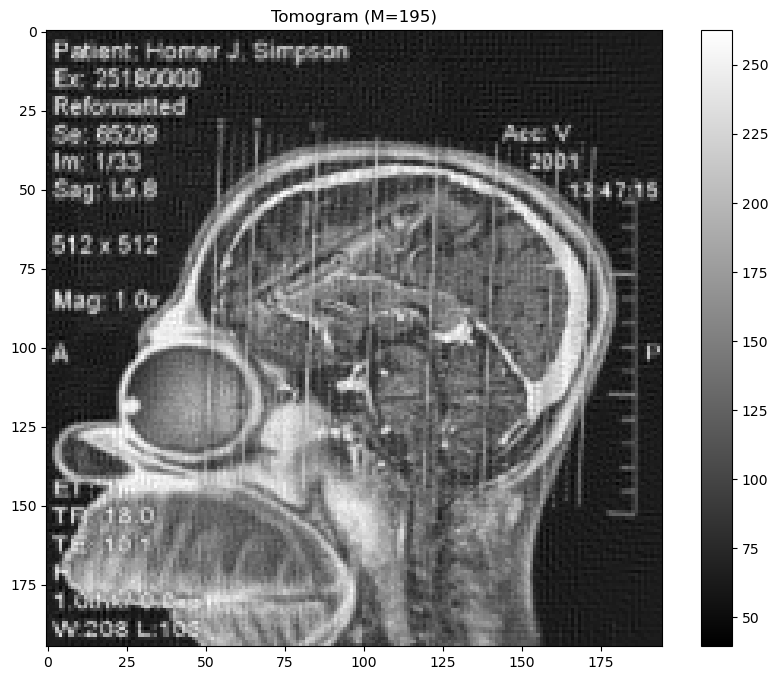

Number of non-zero entries: 13612950
Sparsity: 0.992727


In [ ]:
import os
import numpy as np
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import lsqr
import matplotlib.pyplot as plt

def coo_to_csc(coo):
    if isinstance(coo, csc_matrix):
        return coo
    else:
        return coo.tocsc()

def show_tomogram(X, y, M):
    beta = lsqr(X, y, atol=1e-05, btol=1e-05)[0]
    
    mu = np.reshape(beta, (M, M))
    plt.figure(figsize=(10, 8))
    plt.imshow(mu, cmap="gray", interpolation="nearest")
    plt.colorbar()
    plt.title(f"Tomogram (M={M})")
    plt.show()

def print_sparsity(X):
    print(f"Number of non-zero entries: {X.nnz}")
    print(f"Sparsity: {1 - (X.nnz / (X.shape[0] * X.shape[1])):.6f}")

# Ensure we're in the correct directory
if not os.path.exists('hs_tomography'):
    os.chdir(os.path.dirname(os.path.abspath(__file__)))

# Small version
print("Small version:")
alphas_77 = np.load("hs_tomography/alphas_77.npy")
y_77 = np.load("hs_tomography/y_77.npy")
X_77 = csc_matrix(np.load("hs_tomography/X_77.npy", allow_pickle=True).item())
M_77 = 77
show_tomogram(X_77, y_77, M_77)
print_sparsity(X_77)

# Large version
print("\nLarge version:")
alphas_195 = np.load("hs_tomography/alphas_195.npy")
y_195 = np.load("hs_tomography/y_195.npy")
X_195 = coo_to_csc(construct_X(195, alphas_195, 275))
M_195 = 195
show_tomogram(X_195, y_195, M_195)
print_sparsity(X_195)

Diagnosis: H.S.'s headache is caused by a crayon lodged in his brain since childhood.
Treatment:

Remove crayon surgically (but warn patient about potential increase in intelligence).
Prescribe daily doses of donuts and TV to maintain comfortable lifestyle.
Regular check-ups at Moe's for "mental health support."
(Simpsons S9E12)


# Task 3

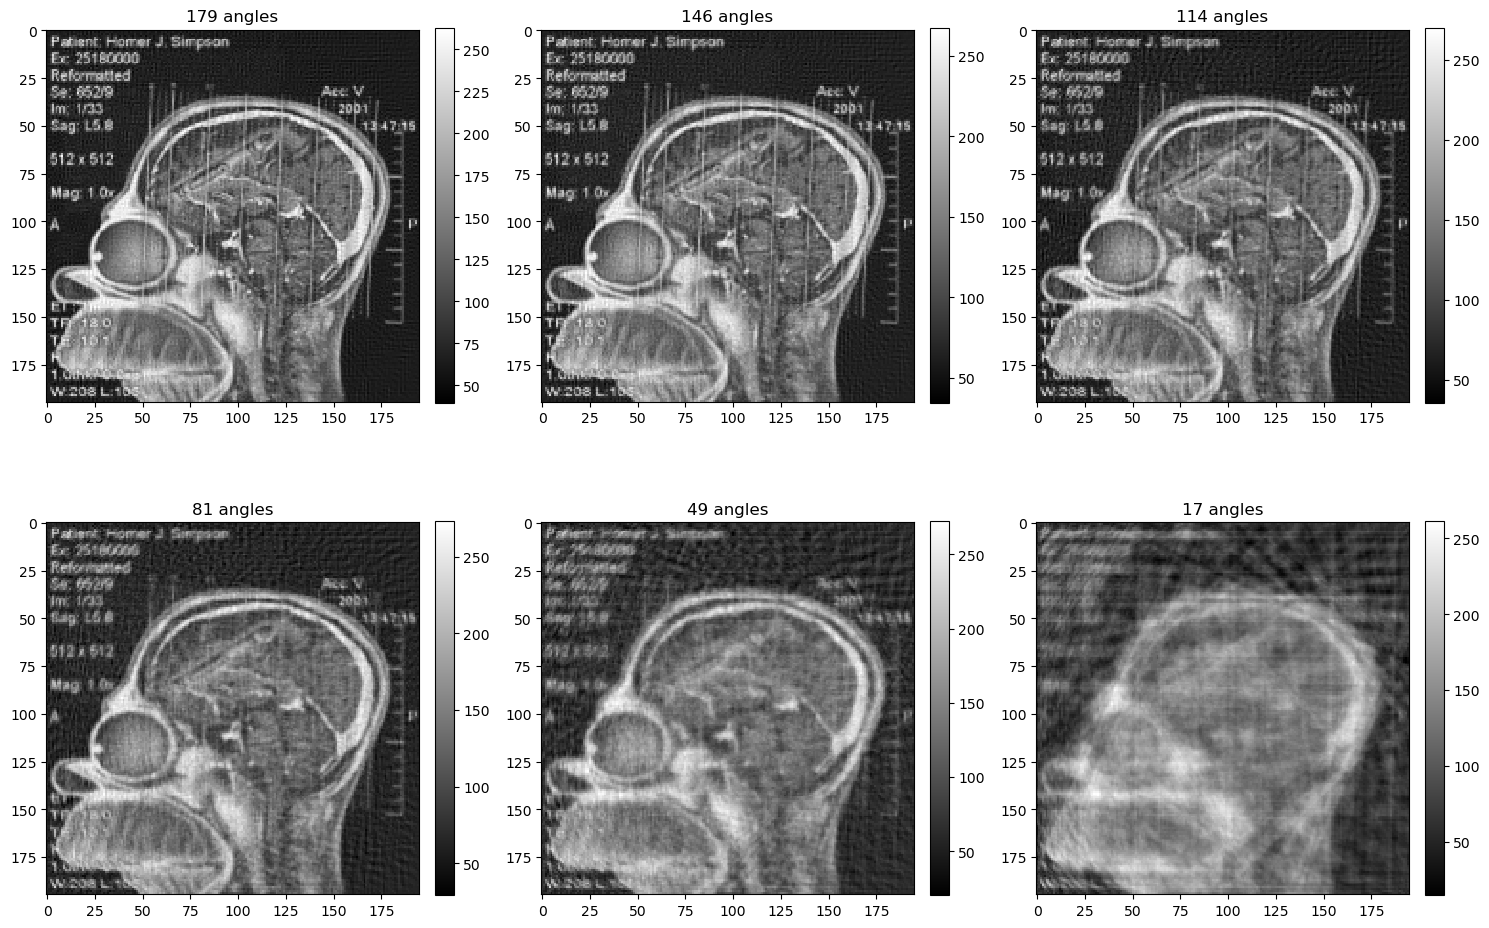

Task 3 completed. Please examine the images to determine the minimum number of angles needed to identify the foreign object.


In [ ]:
import os
import numpy as np
from scipy.sparse import coo_matrix
from scipy.sparse.linalg import lsqr
import matplotlib.pyplot as plt

# Ensure we're in the correct directory
if not os.path.exists('hs_tomography'):
    os.chdir(os.path.dirname(os.path.abspath(__file__)))

def construct_X(M, alphas, Np=None):
    # Implementation from Task 1
    if Np is None:
        Np = int(np.ceil(np.sqrt(2) * M))
        if Np % 2 == 0:
            Np += 1
    
    extent = (M-1)/2
    j_a, j_b = np.mgrid[-extent:extent+1, -extent:extent+1]
    C = np.row_stack([j_a.flatten(), j_b.flatten()])
    
    alphas = np.deg2rad(alphas)
    n = np.row_stack([-np.sin(alphas), np.cos(alphas)])

    p = (n.T @ C) + ((Np-1)/2)
    p_split_f, p_split_i = np.modf(p)
    
    w0 = 1 - p_split_f
    w1 = p_split_f
    i_0 = p_split_i.astype(int)
    i_1 = i_0 + 1

    for i in range(len(alphas)):
        i_0[i,:] += Np * i
        i_1[i,:] += Np * i
    
    i_indices = np.concatenate([i_0, i_1]).flatten()
    j_indices = np.tile(np.arange(C.shape[1]), 2*len(alphas))
    weights = np.concatenate([w0, w1]).flatten()

    X = coo_matrix((weights, (i_indices, j_indices)), 
                   shape=(Np * len(alphas), C.shape[1]), 
                   dtype=np.float32)
    
    return X

def show_tomogram(X, y, M, ax, title):
    beta = lsqr(X, y, atol=1e-05, btol=1e-05)[0]
    mu = np.reshape(beta, (M, M))
    im = ax.imshow(mu, cmap="gray", interpolation="nearest")
    ax.set_title(title)
    return im

# Load the data for the large version
M = 195
Np = 275
alphas = np.load("hs_tomography/alphas_195.npy")
y = np.load("hs_tomography/y_195.npy")
n_alphas = len(alphas)

# Define the number of tomograms to generate
num_tomograms = 6

# Calculate the angles for each tomogram
angle_counts = np.linspace(n_alphas, max(10, n_alphas // 10), num_tomograms, dtype=int)

# Set up the plot
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

# Generate and display tomograms
for i, n_angles in enumerate(angle_counts):
    indices = np.linspace(0, len(alphas) - 1, n_angles, dtype=int)
    alphas_ = alphas[indices]
    y_ = np.concatenate([y[Np*j:Np*(j+1)] for j in indices])
    X_ = construct_X(M, alphas_, Np)
    title = f"{n_angles} angles"
    im = show_tomogram(X_, y_, M, axes[i], title)
    fig.colorbar(im, ax=axes[i], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

print("Task 3 completed.")


The minimum number of angles needed to identify the foreign object with reasonable clarity is 49, but for better detail, at least 81 angles are recommended.